# Performance Analysis of various Data Science techniques on Crime Data

## I. Decision Tree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)
import pydotplus 
from IPython.display import Image 
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

C:\Users\Sahaanah\AppData\Local\Temp/ipykernel_7628/1091099426.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  initial = initial.drop('communityname', 1)
C:\Users\Sahaanah\AppData\Local\Temp/ipykernel_7628/1091099426.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  initial = initial.drop('ViolentCrimesPerPop', 1)
C:\Users\Sahaanah\AppData\Local\Temp/ipykernel_7628/1091099426.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  initial = initial.drop('fold', 1)
C:\Users\Sahaanah\AppData\Local\Temp/ipykernel_7628/1091099426.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  initial = initial.drop('state', 1)


ModuleNotFoundError: No module named 'pydotplus'

In [120]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

cross_val_accuracy is  [ 0.79        0.875       0.83        0.84924623  0.65326633  0.75879397
  0.84924623  0.7839196   0.79396985  0.79899497]
cross_val_accuracy_avg is  0.798243718593
cross_val_precision is  [ 0.78231293  0.85211268  0.84210526  0.88        0.75454545  0.88118812
  0.85185185  0.94565217  0.79166667  0.85123967]
cross_val_precision_avg is  0.843267479959
cross_val_recall is  [ 0.92   0.968  0.896  0.88   0.664  0.712  0.92   0.696  0.912  0.824]
cross_val_recall_avg is  0.8392


In [120]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

cross_val_accuracy is  [ 0.79        0.875       0.83        0.84924623  0.65326633  0.75879397
  0.84924623  0.7839196   0.79396985  0.79899497]
cross_val_accuracy_avg is  0.798243718593
cross_val_precision is  [ 0.78231293  0.85211268  0.84210526  0.88        0.75454545  0.88118812
  0.85185185  0.94565217  0.79166667  0.85123967]
cross_val_precision_avg is  0.843267479959
cross_val_recall is  [ 0.92   0.968  0.896  0.88   0.664  0.712  0.92   0.696  0.912  0.824]
cross_val_recall_avg is  0.8392


In [121]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 83.592574009
Precesion is 90.0260190807
Recall is 83.04


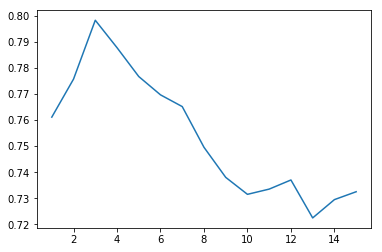

 [0.76111306532663314, 0.77569346733668343, 0.79824371859296483, 0.78773366834170866, 0.7766758793969849, 0.76965577889447234, 0.76515829145728653, 0.74956030150753772, 0.73803517587939704, 0.73152763819095479, 0.73353517587939687, 0.73703015075376888, 0.72249246231155773, 0.72950502512562809, 0.73252512562814076]


In [123]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()

print('',y)

In [122]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [71  5  3 44]
4_max_normalized_feature is  [ 0.02009928  0.09165031  0.16830665  0.71994376]
71
feature_name[index] is  HousVacant
5
feature_name[index] is  racePctHisp
3
feature_name[index] is  racePctWhite
44
feature_name[index] is  PctKids2Par


## II. Gaussian NB

In [124]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
# print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])





from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

mislabel num is  442
ind is  [38 44 45 41 15 46 50  3 43 40]
10_max_normalized_feature is  [ 0.61686366  0.80974842  0.66500857  0.67464461  0.66107643  0.64294945
  0.70926105  0.73522995  0.74554481  0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv
cross_val_accuracy is  [ 0.775       0.8         0.825       0.79899497  0.70351759  0.65326633
  0.81407035  0.73366834  0.71356784  0.79899497]
cross_val_accuracy_avg is  0.761608040201
cross_val_precision is  [ 0.86363636  0.92929293  0.95        0.92079208  0.94594595  0.86842105
  0.92307692  1.          0.77868852  0.93814433]
cross_val_precision_avg is  0.911799814828
cross_val_reca

## III. SVM

In [125]:
from sklearn import svm
lin_svc = svm.LinearSVC(C=0.01447, penalty="l1", dual=False).fit(initial, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
print("",feature_weight)
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i], ' feature_weight is ', feature_weight[i])



from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(lin_svc, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(lin_svc, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(lin_svc, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean())  

 [ 0.          0.          0.14001883  0.60158853  0.          0.29846094
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.20685957  1.40999677  0.          0.          0.5248893   0.          0.
  0.          0.          0.          0.37405216  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.18042693  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.17249698  0.          0.
  0.          

## IV. Linear Model

In [126]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

lr = linear_model.LinearRegression(normalize=True)
Y = df['ViolentCrimesPerPop']
predicted = cross_val_predict(lr, initial, Y, cv=10)
print('10_fold_cv_MSE is ',mean_squared_error(Y, predicted))
y_pred = lr.fit(initial, Y).predict(initial)

print('MSE on training set is ',mean_squared_error(Y, y_pred))

# print('coef is ',lr.coef_)

min=np.min(lr.coef_)
print('min is ',min)
index_min = np.argmin(lr.coef_)
print(index_min)
max=np.max(lr.coef_)
print('max is ',max)
index_max = np.argmax(lr.coef_)
print(index_max)
print('coefficient[min] is ',feature_name[index_min])

print('coefficient[max] is ',feature_name[index_max])

10_fold_cv_MSE is  0.0201026984667
MSE on training set is  0.0165167748803
min is  -0.675694478803
67
max is  0.635088116499
64
coefficient[min] is  PctPersOwnOccup
coefficient[max] is  PersPerOccupHous


## V. Ridge CV

In [127]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# Using RidgeCV to reduce the amount of verfitting
ridge_model = RidgeCV(alphas=[10.0,1.0,0.1, 0.01, 0.001])
print(ridge_model)
ridge_reg_score = cross_val_predict(ridge_model, initial, Y, cv=10)
ridge_fit = ridge_model.fit(initial, Y)
#To get the best alpha
print('Best Alpha: ', ridge_model.alpha_)
ridge_predict = ridge_model.predict(initial)
#accuracy of each Fold
print(ridge_reg_score)
#mean accuracy of 10 Folds
print(ridge_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is: ',mean_squared_error(Y, ridge_reg_score))

#MSE on the Training set
mse_ridge = np.mean((ridge_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_ridge)

RidgeCV(alphas=[10.0, 1.0, 0.1, 0.01, 0.001], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
Best Alpha:  1.0
[ 0.15629536  0.29723509  0.52328122 ...,  0.09344901  0.16300833
  0.16714695]
0.237082421104
10_fold_cv_MSE is:  0.0198039525288
Mean Square Error on training set:  0.016763529155169456


## VI. Linear Regression with Pipeline

In [128]:
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pol = PolynomialFeatures(degree = 2)
print(pol)

lin_reg = LinearRegression()
pip = Pipeline([("polynomial Feature", pol),("linear_Regression", lin_reg)])
poly_reg_score = cross_val_predict(pip, initial, Y, cv=10)
p_fit = pip.fit(initial, Y)
p_predict = pip.predict(initial)
#accuracy of each fold
print(poly_reg_score)
#mean accuracy of 10 Folds
print(poly_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is ',mean_squared_error(Y, poly_reg_score))

#MSE on Training Set
mse_poly = np.mean((p_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_poly)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
[ 0.54690473  0.53204015  0.32259675 ..., -0.19221053  0.17285522
  0.40108437]
0.235721580411
10_fold_cv_MSE is  0.129955108714
Mean Square Error on training set:  1.3968962136279826e-28


In [129]:
df=pd.read_csv('communities-crime-full.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']

# print('total len is ',len(Y))
initial=pd.read_csv('communities-crime-full.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('community', 1)
initial = initial.drop('county', 1)

feature_name=list(initial)
initial=initial.convert_objects(convert_numeric=True)
New_data=initial.fillna(initial.mean())
# print('before...')
# print(initial)
# print('after...')
# print(New_data)  
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(New_data, Y)
clf
fold=df['fold']
scores = cross_val_score(clf, New_data, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, New_data, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, New_data, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

/Users/YiChen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


cross_val_accuracy is  [ 0.81094527  0.81        0.805       0.79899497  0.82914573  0.77386935
  0.85427136  0.83417085  0.80904523  0.8040201 ]
cross_val_accuracy_avg is  0.812946286157
cross_val_precision is  [ 0.90740741  0.85365854  0.84677419  0.84        0.85826772  0.85714286
  0.92105263  0.92592593  0.85950413  0.90566038]
cross_val_precision_avg is  0.877539377831
cross_val_recall is  [ 0.77777778  0.84        0.84        0.84        0.872       0.768       0.84
  0.8         0.832       0.768     ]
cross_val_recall_avg is  0.817777777778


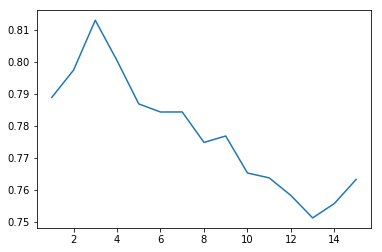

y is  [0.78886085902147562, 0.79737344683617095, 0.81294628615715392, 0.80036095902397564, 0.78682827070676775, 0.784303195079877, 0.78432078301957542, 0.77480812020300505, 0.77681563289082234, 0.76526284407110179, 0.76374533113327836, 0.75824020600515007, 0.75124510612765305, 0.75575515637890944, 0.7632602565064126]


In [130]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(New_data, Y)
    y_pred = clf.predict(New_data)
    scores = cross_val_score(clf, New_data, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()
print('y is ',y)

In [131]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [29  5  3 44]
4_max_normalized_feature is  [ 0.02422915  0.04857088  0.09191501  0.35879597]
29
feature_name[index] is  PctLess9thGrade
5
feature_name[index] is  racePctHisp
3
feature_name[index] is  racePctWhite
44
feature_name[index] is  PctKids2Par


## VII. KNN

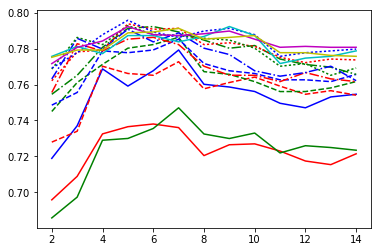

In [133]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('communities-crime-clean.csv')
Y = df['highCrime']
fold=df['fold']
state=df['state']
community=df['communityname']
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)

x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

<ul>
<li>X-axis is number of components</li>
<li>Y-axis is accuracy
<ul>
<li>Red-solid-line is k=1</li>
<li>Green-solid-line is k=2</li>
<li>Blue-solid-line is k=3</li>
<li>Red-dashed-line is k=4</li>
<li>Green-dashed-line is k=5</li>
<li>Blue-dashed-line is k=6</li>
<li>Red-dash-dot-line is k=7</li>
<li>Green-dash-dot-line is k=8</li>
<li>Blue-dash-dot-line is k=9</li>
<li>Red-dotted-line is k=10</li>
<li>Green-dotted-line is k=11</li>
<li>Blue-dotted-line is k=12</li>
<li>Cyan-solid-line is k=13</li>
<li>Magenta-solid-line is k=14</li>
<li>Yellow-solid-line is k=15</li>
</ul></li>
</ul>

Blue dotted line has best performance at n-components=5 meaning k=12

In [134]:
pca = PCA(n_components=5)
pca.fit(initial)
pca.components_

array([[ -2.04052546e-02,   9.75132690e-03,  -1.28371329e-01,
          1.23044608e-01,   6.52084194e-02,  -6.14280591e-02,
         -4.72820587e-02,  -4.60121765e-02,  -4.71777648e-02,
         -3.46626378e-02,  -1.56537431e-02,   1.52570830e-01,
          1.88492101e-01,   1.03286139e-01,  -7.18548440e-03,
          1.48691465e-01,  -6.12543207e-02,  -1.73401439e-01,
          4.48956257e-03,   1.79662679e-01,   1.61193740e-01,
          1.40327609e-01,   1.07194806e-01,   4.39239209e-02,
          8.19922061e-02,   7.74816512e-02,   1.13058167e-01,
         -3.97531389e-02,  -1.91357751e-01,  -1.50661446e-01,
         -1.59431939e-01,   1.42844505e-01,  -1.52692314e-01,
          1.10214847e-01,  -2.33208904e-02,   1.61083945e-02,
         -1.34972468e-01,   1.35500286e-01,  -1.06437345e-01,
         -4.01754009e-02,  -1.01677202e-01,  -1.09737150e-01,
         -1.29668589e-02,   1.62749424e-01,   1.68736871e-01,
          1.78676474e-01,   1.33751535e-01,  -1.18987095e-02,
        

In [135]:
pca.explained_variance_ratio_

array([ 0.26753256,  0.1879639 ,  0.08245766,  0.07097958,  0.04612133])

In [136]:
pcdf = pca.transform(initial)
pcdf

array([[ 0.42940989, -0.53929962,  0.31031455,  0.61492902, -0.78039836],
       [-1.19933196, -0.90092286,  0.31801596,  0.06578611,  0.08519296],
       [-1.25540273, -0.45223119, -0.37326947, -0.57765154, -0.34191667],
       ..., 
       [-0.39828125, -0.04847062, -0.72054899,  1.84903697,  0.50341825],
       [-0.06739216, -0.87415147,  0.57794265,  0.14245351, -0.03894366],
       [-0.53794345, -0.94270676, -0.0499251 ,  0.22885668,  0.51675747]])

In [138]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 87.0279146141
Accuracy is 84.1445057702
Precision is 89.3760539629
Recall is 84.8


In [139]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 79.5728643216
Cross validation precision is 85.3588446077
Cross validation recall is 81.6


In [140]:
feature_name=list(initial)

ind = np.argpartition(pca.components_[0], -10)[-10:]

print('ind is ',ind)
print('10_max_vector_components is ',pca.components_[0][ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('vector_component[index] is ',feature_name[index])

ind is  [83 84 80 19 45 44 81 82 85 12]
10_max_vector_components is  [ 0.16356539  0.19320424  0.16436957  0.17966268  0.17867647  0.16873687
  0.16398596  0.16706879  0.16710099  0.1884921 ]
83
vector_component[index] is  RentMedian
84
vector_component[index] is  RentHighQ
80
vector_component[index] is  OwnOccMedVal
19
vector_component[index] is  medFamInc
45
vector_component[index] is  PctYoungKids2Par
44
vector_component[index] is  PctKids2Par
81
vector_component[index] is  OwnOccHiQuart
82
vector_component[index] is  RentLowQ
85
vector_component[index] is  MedRent
12
vector_component[index] is  medIncome


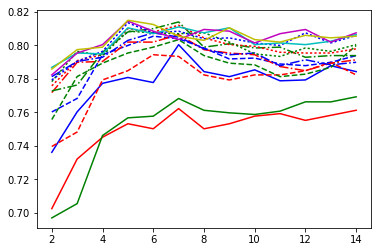

In [143]:
df=pd.read_csv('communities-crime-full.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']
x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(New_data)
    pcdf = pca.transform(New_data)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

In [144]:
pca = PCA(n_components=5)
pca.fit(New_data)
pca.components_

array([[ -2.05868501e-02,   9.75819912e-03,  -1.29180835e-01,
          1.23575532e-01,   6.51854594e-02,  -6.12052661e-02,
         -4.71845615e-02,  -4.58094979e-02,  -4.69925869e-02,
         -3.46798200e-02,  -1.58243934e-02,   1.52668790e-01,
          1.88267648e-01,   1.03334631e-01,  -7.14474897e-03,
          1.48575631e-01,  -6.12402679e-02,  -1.73533941e-01,
          4.48558660e-03,   1.79462994e-01,   1.60939303e-01,
          1.39935680e-01,   1.07041398e-01,   4.38929392e-02,
          8.17176372e-02,   7.72774286e-02,   1.12556720e-01,
         -3.99788267e-02,  -1.91486828e-01,  -1.50541901e-01,
         -1.59258997e-01,   1.42536645e-01,  -1.52856395e-01,
          1.10267208e-01,  -2.31152613e-02,   1.59113810e-02,
         -1.34624608e-01,   1.35089944e-01,  -1.06389755e-01,
         -4.01904725e-02,  -1.01626911e-01,  -1.09689028e-01,
         -1.30285003e-02,   1.62909635e-01,   1.68913509e-01,
          1.78892728e-01,   1.33961330e-01,  -1.19086566e-02,
        

In [145]:
pca.explained_variance_ratio_

array([ 0.25854019,  0.18166128,  0.07971167,  0.06863376,  0.0447857 ])

In [146]:
pcdf = pca.transform(New_data)
pcdf

array([[ 0.35772934, -0.28927626, -0.55437695,  0.12694531,  0.42805094],
       [-0.16418724,  0.26989243, -0.95874063,  0.24922094,  0.14474592],
       [-0.60595542, -0.51332098,  0.07151308, -0.02621491, -0.01678202],
       ..., 
       [-0.58777866,  0.19536295, -0.19990588, -0.85729035,  0.11442621],
       [ 0.54779527,  0.72318122, -0.35253007,  0.05258148, -0.29110964],
       [-0.39754717,  2.11859241,  0.69516673,  0.24787927,  0.53698403]])

In [147]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 86.8001634655
Accuracy is 83.8014042126
Precision is 88.7959866221
Recall is 84.8920863309


In [148]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 81.4403747594
Cross validation precision is 86.8883347272
Cross validation recall is 82.9726984127


In [149]:
ind = np.argpartition(pca.components_[0], -10)[-10:]

print('ind is ',ind)
print('10_max_vector_components is ',pca.components_[0][ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('vector_component[index] is ',feature_name[index])

ind is  [83 81 80 82 44 85 45 19 84 12]
10_max_vector_components is  [ 0.16342824  0.16370787  0.16412937  0.16698354  0.16891351  0.16691431
  0.17889273  0.17946299  0.19298567  0.18826765]
83
vector_component[index] is  RentMedian
81
vector_component[index] is  OwnOccHiQuart
80
vector_component[index] is  OwnOccMedVal
82
vector_component[index] is  RentLowQ
44
vector_component[index] is  PctKids2Par
85
vector_component[index] is  MedRent
45
vector_component[index] is  PctYoungKids2Par
19
vector_component[index] is  medFamInc
84
vector_component[index] is  RentHighQ
12
vector_component[index] is  medIncome


In [152]:
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']

## VIII. SVC

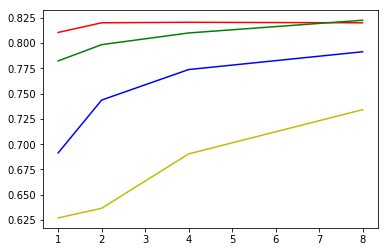

In [153]:
from sklearn.svm import SVC
x=[]
y=[]
for k in range (1,5):
    y.append([])
for i in range (0,4):
    for j in range (1,5):
        poly_svc = SVC(C=2**i, kernel='poly', degree=j).fit(initial, Y)
        scores = cross_val_score(poly_svc,initial,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(2**i)    

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'y-')
plt.show()

In [154]:
poly_svc = SVC(C=8, kernel='poly', degree=2).fit(initial, Y)
scores = cross_val_score(poly_svc,initial,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(poly_svc,initial,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(poly_svc,initial,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 82.233919598
Cross validation precision is 85.8005724921
Cross validation recall is 86.8


In [156]:
df=pd.read_csv('communities-crime-full.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']

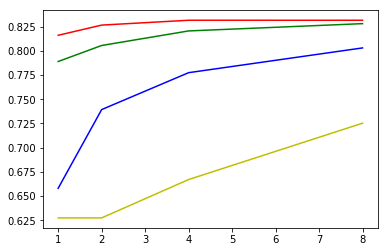

In [157]:
x=[]
y=[]
for k in range (1,5):
    y.append([])
for i in range (0,4):
    for j in range (1,5):
        poly_svc = SVC(C=2**i, kernel='poly', degree=j).fit(New_data, Y)
        scores = cross_val_score(poly_svc,New_data,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(2**i)    

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'y-')
plt.show()

In [158]:
poly_svc = SVC(C=4, kernel='poly', degree=2).fit(New_data, Y)
scores = cross_val_score(poly_svc,New_data,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(poly_svc,New_data,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(poly_svc,New_data,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 82.045641141
Cross validation precision is 84.1192072837
Cross validation recall is 88.0888888889


average is  0.237982940291
Q1(25%) is  0.07
median is  0.15
Q3(75%) is  0.33
average between Q3 and Q1 is  0.2


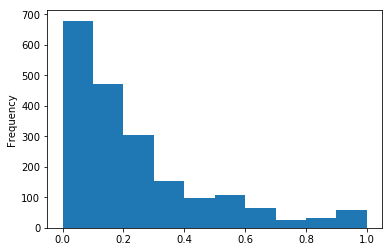

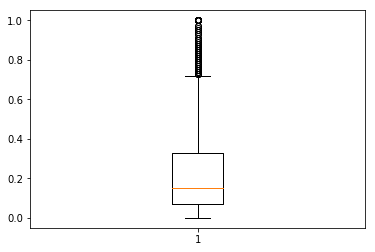

In [160]:
df=pd.read_csv('communities-crime-clean.csv')
# df.describe()
df['ViolentCrimesPerPop'].plot.hist()
print('average is ',np.average(df['ViolentCrimesPerPop']))
Q1, median, Q3 = np.percentile(df['ViolentCrimesPerPop'], [25, 50, 75])
print("Q1(25%) is ",Q1)
print("median is ",median)
print("Q3(75%) is ",Q3)
print("average between Q3 and Q1 is ",(Q3+Q1)/2)
plt.show()
plt.boxplot(df['ViolentCrimesPerPop'])
plt.show()

In [183]:
df=pd.read_csv('communities-crime-full.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(New_data, Y)
clf
fold=df['fold']
scores = cross_val_score(clf, New_data, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 

print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(clf,New_data,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf,New_data,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)


cross_val_accuracy is  [ 0.785       0.805       0.775       0.785       0.805       0.82
  0.79396985  0.84422111  0.85353535  0.79292929]
Cross validation accuracy is 80.5965560124
Cross validation precision is 76.8498938447
Cross validation recall is 74.6975308642


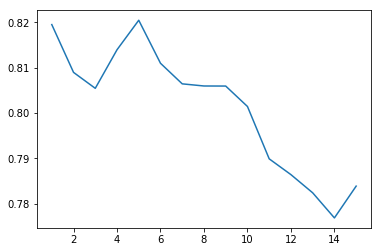

y is  [0.8195286533678493, 0.80898319882239478, 0.80546556012385173, 0.81397558499568556, 0.8204881731891781, 0.81099578701588748, 0.80645287041266944, 0.80598063550073606, 0.8059654586061622, 0.80146045885995643, 0.78990500482209025, 0.78642013095781949, 0.78241013146540794, 0.77686970204558148, 0.78388728998528001]


In [184]:
import matplotlib.pyplot as plt
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(New_data, Y)
    y_pred = clf.predict(New_data)
    scores = cross_val_score(clf, New_data, Y,None,'accuracy',cv=10,n_jobs = -1)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()
print('y is ',y)

In [ ]:
classname=['High','Low']
clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(New_data, Y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(New_data),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [ ]:
df=pd.read_csv('communities-crime-clean.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']


clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(initial, Y)
clf
import pydotplus 
from IPython.display import Image 
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [196]:
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 

print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

# y_pred = clf.predict(initial)
# print ('Accuracy is', accuracy_score(Y,y_pred)*100)
# from sklearn.metrics import precision_score
# print ('Precesion is', precision_score(Y,y_pred)*100)
# from sklearn.metrics import recall_score
# print ('Recall is', recall_score(Y,y_pred)*100)

cross_val_accuracy is  [ 0.745       0.815       0.78        0.805       0.855       0.72864322
  0.8040201   0.85929648  0.65151515  0.77777778]
Cross validation accuracy is 78.2125272829
Cross validation precision is 76.6395399224
Cross validation recall is 70.549382716


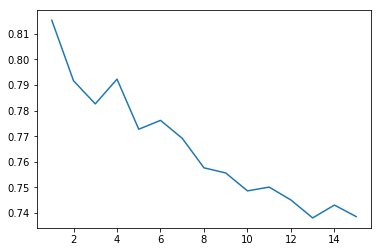

y is  [0.81532196335211415, 0.79165542358255925, 0.78263032333384097, 0.79229937566620989, 0.77271871986193597, 0.77619095477386935, 0.76916585452515096, 0.75763555149484796, 0.75563060250748693, 0.7486205014973859, 0.75009781229379224, 0.7450524846454496, 0.7380525607837165, 0.74307017410283749, 0.73857266128622912]


In [197]:
y=[]
x=[]

for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()
print('y is ',y)

In [198]:
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])





from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',np.mean(scores)*100) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',np.mean(scores)*100) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',np.mean(scores)*100) 

mislabel num is  352
normalized_feature is  [ 0.33306076  0.03258098  0.57607554  0.72301674  0.04198184  0.35978937
  0.05081276  0.1491096   0.09012258  0.07690147  0.31722709  0.02102557
  0.50499798  0.32275839  0.10399085  0.68789992  0.12525604  0.63770018
  0.08482528  0.52115517  0.39921489  0.24898057  0.33249932  0.11958945
  0.18131628  0.1593845   0.29721696  0.4271772   0.57247427  0.46873416
  0.53762178  0.35764455  0.53696231  0.35122208  0.02515546  0.10257724
  0.31749042  0.37536845  0.57546639  0.2216214   0.65369163  0.63466832
  0.12098212  0.77237886  0.84288241  0.71696935  0.66301396  0.04048604
  0.17378054  0.41761193  0.78896678  0.26418494  0.1721343   0.22136547
  0.25550443  0.30076635  0.22549075  0.24285105  0.24483414  0.25357801
  0.26564133  0.32422931  0.37334747  0.29009904  0.029548    0.13965855
  0.28580806  0.58538383  0.50490824  0.52004923  0.37863295  0.38278532
  0.32275872  0.49473664  0.41475204  0.00776573  0.07533747  0.54894892
  0.335

In [199]:
df=pd.read_csv('communities-crime-full.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
gnb = GaussianNB()
y_pred = gnb.fit(New_data, Y).predict(New_data)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])


fold=df['fold']
scores = cross_val_score(gnb, New_data, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',np.mean(scores)*100) 
scores = cross_val_score(gnb, New_data, Y,fold,'precision',10)
print('cross_val_precision is ',np.mean(scores)*100) 
scores = cross_val_score(gnb, New_data, Y,fold,'recall',10)
print('cross_val_recall is ',np.mean(scores)*100) 

mislabel num is  433
normalized_feature is  [ 0.33274269  0.03287805  0.57704633  0.72386798  0.04153745  0.35920958
  0.05085409  0.14858366  0.08981515  0.07740031  0.31675301  0.0200312
  0.5055121   0.32354202  0.10375662  0.68832887  0.12581775  0.63850066
  0.08474548  0.52167001  0.39959873  0.24903205  0.33286641  0.12001192
  0.18105687  0.15930465  0.29580373  0.42703688  0.57319478  0.46921976
  0.53793289  0.35770605  0.53779681  0.35200369  0.02540681  0.1021982
  0.31726384  0.37483834  0.57581793  0.22154289  0.65395151  0.63499371
  0.1209443   0.77307217  0.84355664  0.7176549   0.66376979  0.040136
  0.1738027   0.41755548  0.78979398  0.26386201  0.17174017  0.22053971
  0.25428553  0.29914528  0.22489731  0.2422117   0.24418607  0.25292452
  0.26491873  0.32366511  0.37324073  0.28994221  0.02975956  0.14011086
  0.28591501  0.58523484  0.50463683  0.51953768  0.37782316  0.38253558
  0.3232456   0.49444454  0.41492867  0.00694628  0.07560749  0.54940092
  0.3366176

In [203]:
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
lin_svc = svm.LinearSVC(C=0.014, penalty="l1", dual=False).fit(initial, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i],' feature_weight_is ',feature_weight[i])



from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(lin_svc, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores,' average ',np.mean(scores)*100) 
scores = cross_val_score(lin_svc, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores,' average ',np.mean(scores)*100) 
scores = cross_val_score(lin_svc, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores,' average ',np.mean(scores)*100) 

select_feature_is  racePctWhite  feature_weight_is  0.614112356594
select_feature_is  racePctHisp  feature_weight_is  0.153482138736
select_feature_is  pctUrban  feature_weight_is  0.00344247204978
select_feature_is  pctWPubAsst  feature_weight_is  0.188160299684
select_feature_is  TotalPctDiv  feature_weight_is  0.6944110073
select_feature_is  PctKids2Par  feature_weight_is  0.603895961438
select_feature_is  PctIlleg  feature_weight_is  0.911383833717
select_feature_is  PctPersDenseHous  feature_weight_is  0.227670704675
select_feature_is  PctHousOccup  feature_weight_is  0.0926189601815
select_feature_is  PctHousNoPhone  feature_weight_is  0.062885686857
select_feature_is  LemasSwFTFieldPerPop  feature_weight_is  0.153428115968
cross_val_accuracy is  [ 0.785       0.845       0.8         0.815       0.85        0.72864322
  0.84924623  0.84422111  0.77272727  0.84343434]  average  81.3327216893
cross_val_precision is  [ 0.7375      0.94642857  0.83606557  0.89285714  0.9047619   0.74

In [204]:
df=pd.read_csv('communities-crime-full.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
fold=df['fold']
feature_name=list(New_data)
lin_svc = svm.LinearSVC(C=0.014, penalty="l1", dual=False).fit(New_data, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i],' feature_weight_is ',feature_weight[i])



from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(lin_svc, New_data, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores,' average ',np.mean(scores)*100) 
scores = cross_val_score(lin_svc, New_data, Y,fold,'precision',10)
print('cross_val_precision is ',scores,' average ',np.mean(scores)*100) 
scores = cross_val_score(lin_svc, New_data, Y,fold,'recall',10)
print('cross_val_recall is ',scores,' average ',np.mean(scores)*100) 

select_feature_is  racePctWhite  feature_weight_is  0.616754261271
select_feature_is  racePctHisp  feature_weight_is  0.1539511259
select_feature_is  pctUrban  feature_weight_is  0.00335099672919
select_feature_is  pctWPubAsst  feature_weight_is  0.189393357691
select_feature_is  TotalPctDiv  feature_weight_is  0.695595603405
select_feature_is  PctKids2Par  feature_weight_is  0.600583877083
select_feature_is  PctIlleg  feature_weight_is  0.911209269573
select_feature_is  PctPersDenseHous  feature_weight_is  0.225560742182
select_feature_is  PctHousOccup  feature_weight_is  0.093368705894
select_feature_is  PctHousNoPhone  feature_weight_is  0.0626665123771
select_feature_is  LemasPctOfficDrugUn  feature_weight_is  0.153443795657
cross_val_accuracy is  [ 0.79        0.8         0.845       0.805       0.835       0.805
  0.84422111  0.81909548  0.87373737  0.84848485]  average  82.6553880514
cross_val_precision is  [ 0.83050847  0.78873239  0.82894737  0.78378378  0.9         0.83870968

## IX. Decisional Random Forest Classifier (Proposed Algorithm)

In [212]:
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
fold=df['fold']
Y = df['highCrime']
feature_name=list(initial)
clf = RandomForestClassifier(n_estimators=10,max_features='sqrt')
clf = clf.fit(initial, Y)
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=list(initial),  
#                          class_names='highCrime',  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

In [216]:
y_pred = clf.predict(initial)
feature_importance=clf.feature_importances_
print("feature importance is ",feature_importance)
print ("length feature array",len(feature_importance))
for i in range (0,len(feature_importance)):
    if(feature_importance[i]!=0):
        print("index is ",feature_name[i])

index_max = np.argmax(feature_importance)
print(index_max)

print('coefficient[max] is ',feature_name[index_max])

feature importance is  [ 0.00336806  0.00491396  0.01238699  0.02674893  0.00337491  0.03856691
  0.00411972  0.00708183  0.00461754  0.01074888  0.00613592  0.00182933
  0.00391672  0.00487733  0.00895112  0.01952189  0.00575116  0.00689367
  0.01018738  0.00493616  0.00399692  0.00752718  0.00687497  0.00327274
  0.00300188  0.00897779  0.00695895  0.00631996  0.03405884  0.00697879
  0.00582739  0.0034084   0.0051311   0.00874668  0.00857364  0.00521363
  0.00789191  0.00516418  0.01413912  0.00680554  0.05179789  0.01248677
  0.00464176  0.0675767   0.08668071  0.00851479  0.01116792  0.0052253
  0.00600332  0.04634655  0.04988121  0.00653971  0.00756071  0.00631157
  0.00652946  0.00713335  0.00649662  0.0033839   0.00204338  0.00518434
  0.00422714  0.00463978  0.01008159  0.00662434  0.00318486  0.0041869
  0.00566659  0.00509673  0.03738034  0.00717     0.0006355   0.00795624
  0.00481612  0.02132551  0.00519539  0.00320467  0.00574201  0.00607125
  0.01026423  0.00285569  0.00

### Performance Metrics of the Proposed Algorithm

In [214]:
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precesion is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 99.316994777
Accuracy is 99.1470145509
Precesion is 99.7578692494
Recall is 98.88
